# Heart_failure predictions:

In [136]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

import matplotlib
print(matplotlib.__version__)

In [97]:
data = pd.read_csv('heartt.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [98]:
data.shape

(299, 13)

In [99]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [101]:
data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<AxesSubplot:>

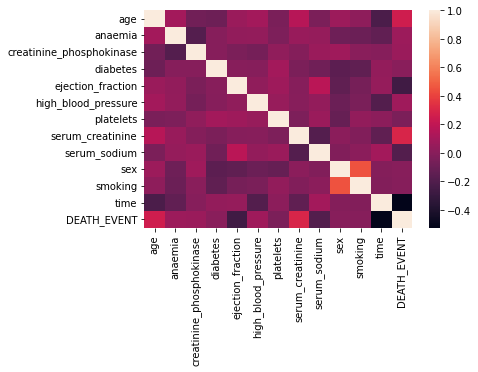

In [102]:
sns.heatmap(data.corr())

In [103]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [104]:
data.value_counts(data['diabetes']==0)

diabetes
True     174
False    125
dtype: int64

In [105]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [106]:
bins = np.arange(0,60,10)
bins

array([ 0, 10, 20, 30, 40, 50])

In [107]:
data['age'] = pd.cut(data.age, bins = bins)

In [108]:
data=pd.get_dummies(data,columns=['age'])
data

,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,"age_(0, 10]","age_(10, 20]","age_(20, 30]","age_(30, 40]","age_(40, 50]"
0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,0,0,0,0,0
1,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,0,0,0,0,0
2,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,0,0,0,0,0
3,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,0,0,0,0,1
4,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,0,0,0,0,0
295,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,0,0,0,0,0
296,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,0,0,0,0,1
297,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,0,0,0,0,1


In [109]:
data.isna().sum()

anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
age_(0, 10]                 0
age_(10, 20]                0
age_(20, 30]                0
age_(30, 40]                0
age_(40, 50]                0
dtype: int64

In [110]:
x = data.drop('DEATH_EVENT',axis=1)
y = data.DEATH_EVENT 

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.3, random_state =32)
xtrain.head()

,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,"age_(0, 10]","age_(10, 20]","age_(20, 30]","age_(30, 40]","age_(40, 50]"
291,0,320,0,35,0,133000.0,1.4,139,1,0,258,0,0,0,0,0
191,1,62,0,60,0,309000.0,1.5,135,0,0,174,0,0,0,0,0
2,0,146,0,20,0,162000.0,1.3,129,1,1,7,0,0,0,0,0
149,0,2261,0,35,1,228000.0,0.9,136,1,0,115,0,0,0,0,0
127,1,200,1,60,0,300000.0,0.8,137,0,0,104,0,0,0,0,0


In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree

# RandomForestClassifier

In [114]:
model_rf = RandomForestClassifier( n_estimators=100,criterion='gini')
model_rf

RandomForestClassifier()

In [115]:
model_rf.__dict__

{'base_estimator': DecisionTreeClassifier(),
 'n_estimators': 100,
 'estimator_params': ('criterion',
  'max_depth',
  'min_samples_split',
  'min_samples_leaf',
  'min_weight_fraction_leaf',
  'max_features',
  'max_leaf_nodes',
  'min_impurity_decrease',
  'random_state',
  'ccp_alpha'),
 'bootstrap': True,
 'oob_score': False,
 'n_jobs': None,
 'random_state': None,
 'verbose': 0,
 'warm_start': False,
 'class_weight': None,
 'max_samples': None,
 'criterion': 'gini',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'ccp_alpha': 0.0}

In [116]:
from sklearn.metrics import confusion_matrix,roc_curve,precision_recall_curve,auc

In [117]:
model_rf.fit(xtrain, ytrain)
yhat = model_rf.predict(xtest)
yhat

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [118]:
list(zip(ytest, yhat))

[(0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 0),
 (0, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (1, 1),
 (0, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0)]

In [119]:
confusion_matrix(yhat, ytest)

array([[55,  5],
       [ 6, 24]], dtype=int64)

<AxesSubplot:>

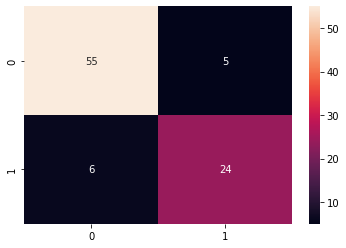

In [120]:
sns.heatmap(confusion_matrix(yhat, ytest), annot = True)

# LogisticRegression

In [121]:
model_lr = LogisticRegression(max_iter = 10000)
model_lr.fit(xtrain, ytrain)
yhat= model_lr.predict(xtest)
confusion_matrix(yhat, ytest)

array([[55, 13],
       [ 6, 16]], dtype=int64)

<AxesSubplot:>

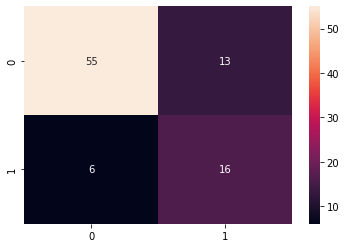

In [122]:
sns.heatmap(confusion_matrix(yhat, ytest), annot = True)

In [123]:
model_dt = DecisionTreeClassifier()
model_dt.fit(xtrain, ytrain)
yhat = model_dt.predict(xtest)
confusion_matrix(yhat, ytest)

array([[52,  5],
       [ 9, 24]], dtype=int64)

<AxesSubplot:>

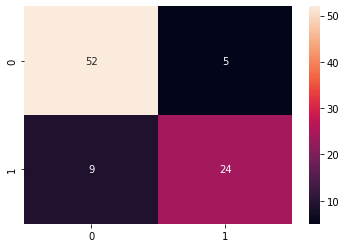

In [124]:
sns.heatmap(confusion_matrix(yhat, ytest), annot = True)

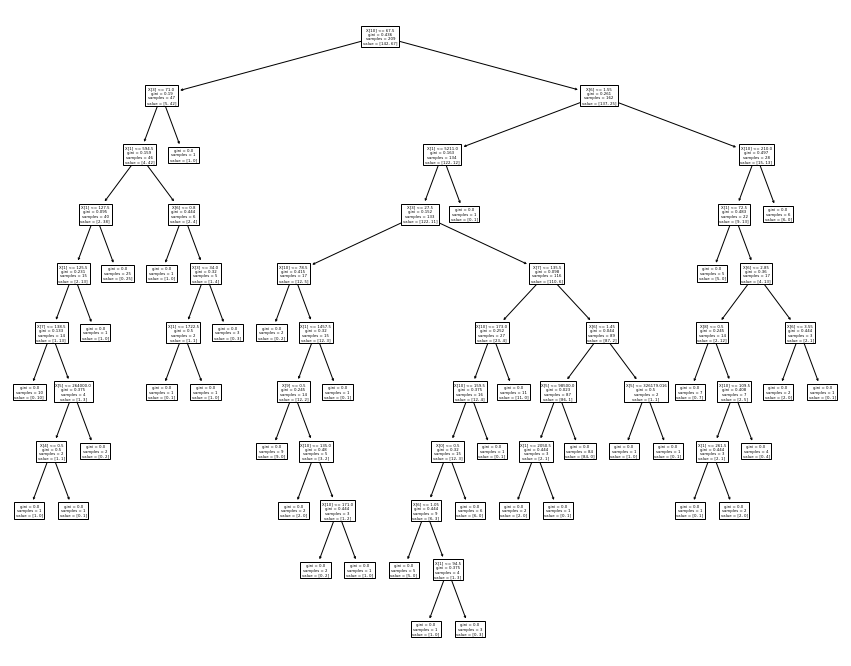

In [75]:
fig=plt.figure(figsize=(15,12))
plt=plot_tree(model_dt)
fig.savefig('tree.pdf')

# SVM

In [125]:
from sklearn.svm import SVC
model_svm=SVC(kernel = "linear")
model_svm.fit(xtrain,ytrain)
yhat=model_svm.predict(xtest)
confusion_matrix(ytest,yhat)

array([[56,  5],
       [10, 19]], dtype=int64)

# AdaboostClassifier

In [126]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()

In [127]:
model.fit(xtrain, ytrain)

AdaBoostClassifier()

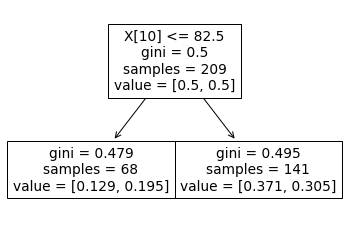

In [128]:
from sklearn.tree import plot_tree
for index, stump in enumerate (model.estimators_):
    plot_tree(stump)
ax.figure.savefig('file.png')

In [129]:
yhat = model.predict(xtest)
list(zip(ytest, yhat))

[(0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 0),
 (0, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 0),
 (0, 1),
 (0, 0),
 (1, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (1, 1),
 (0, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 1),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0)]

In [130]:
cf = confusion_matrix(yhat, ytest)
cf

array([[52,  7],
       [ 9, 22]], dtype=int64)

[Text(0, 0.5, 'True'), Text(0, 1.5, 'false')]

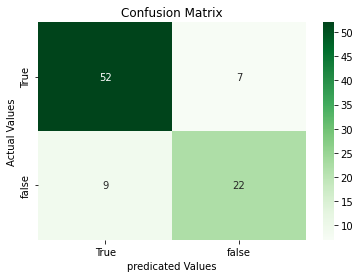

In [131]:
ax=sns.heatmap(cf,annot=True,cmap='Greens')
ax.set(xlabel='predicated Values',ylabel='Actual Values',title='Confusion Matrix')
ax.xaxis.set_ticklabels(['True','false'])
ax.yaxis.set_ticklabels(['True','false'])



In [132]:
from sklearn.naive_bayes import GaussianNB
model_nb=GaussianNB()
model_nb.fit(xtrain,ytrain)
y_hat=model.predict(xtest)
nb=confusion_matrix(ytest,y_hat)
nb

array([[52,  9],
       [ 7, 22]], dtype=int64)

[Text(0, 0.5, 'True'), Text(0, 1.5, 'false')]

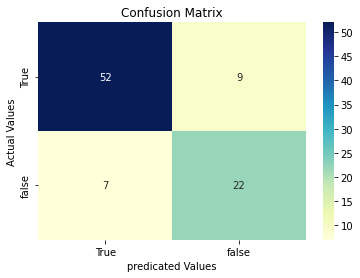

In [133]:
ax=sns.heatmap(nb,annot=True,cmap='YlGnBu')
ax.set(xlabel='predicated Values',ylabel='Actual Values',title='Confusion Matrix')
ax.xaxis.set_ticklabels(['True','false'])
ax.yaxis.set_ticklabels(['True','false'])


In [134]:
from sklearn.tree import plot_tree

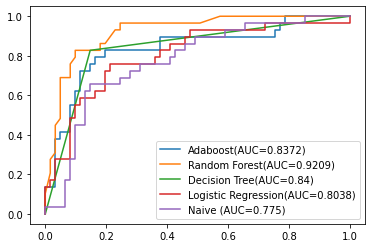

In [135]:
from sklearn.tree import plot_tree
y_prob=model.predict_proba(xtest)[:,1]
tpr,fpr,t=roc_curve(ytest,y_prob)
plt.plot(tpr,fpr,label=f'Adaboost(AUC={round(auc(tpr,fpr),4)})')
         
y_prob=model_rf.predict_proba(xtest)[:,1]
tpr,fpr,t=roc_curve(ytest,y_prob)
plt.plot(tpr,fpr,label=f'Random Forest(AUC={round(auc(tpr,fpr),4)})')
         
y_prob=model_dt.predict_proba(xtest)[:,1]
tpr,fpr,t=roc_curve(ytest,y_prob)
plt.plot(tpr,fpr,label=f'Decision Tree(AUC={round(auc(tpr,fpr),4)})')
         
y_prob=model_lr.predict_proba(xtest)[:,1]
tpr,fpr,t=roc_curve(ytest,y_prob)
plt.plot(tpr,fpr,label=f'Logistic Regression(AUC={round(auc(tpr,fpr),4)})')

y_prob=model_nb.predict_proba(xtest)[:,1]
tpr,fpr,t=roc_curve(ytest,y_prob)
plt.plot(tpr,fpr,label=f'Naive (AUC={round(auc(tpr,fpr),4)})')


plt.legend()